In [2]:
# Librosa.

# pip install librosa 
# pip install scikit-learn
# pip install scipy


import librosa
import librosa.display

# Plotting and numeric libraries.
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Generate a sound
import numpy as np

framerate = 44100

# t = np.linspace(0,5,framerate*5)
# data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
# IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False)
# ipd.Audio(data, rate=framerate)

song = ipd.Audio(url = 'https://ccrma.stanford.edu/workshops/mir2014/audio/125BOUNC-mono.WAV', rate = framerate)

# lib 'https://ccrma.stanford.edu/workshops/mir2014/audio/'

song

In [60]:
import soundfile as sf
import io

from six.moves.urllib.request import urlopen

url = "https://ccrma.stanford.edu/workshops/mir2014/audio/125BOUNC-mono.WAV"

data, sr = sf.read(io.BytesIO(urlopen(url).read()))

print ( data . shape ) 
print ( sr )

# x ,  sr  =  librosa . load ( data )

(338688,)
44100


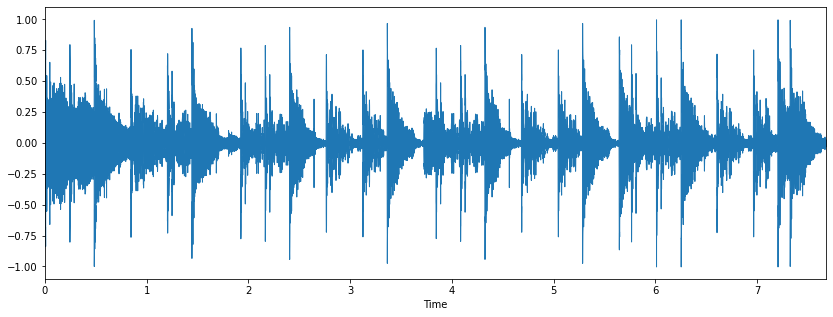

In [64]:
plt.figure(figsize= (14, 5))
librosa.display.waveplot(data, sr = sr)
plt.show()

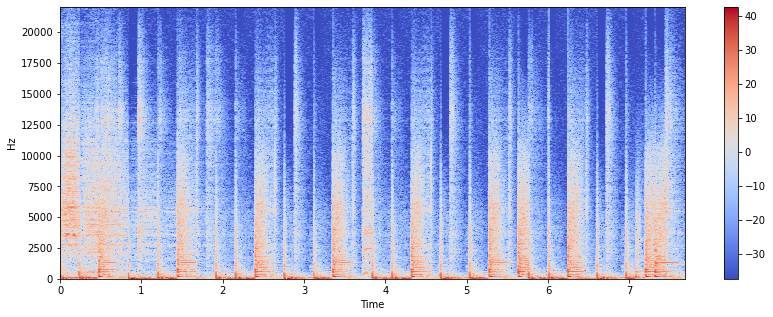

In [67]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()